## Problem Statement

- This dataset offers a comprehensive look at Airbnb prices in popular European cities, including various attributes such as room types, cleanliness, satisfaction ratings, bedrooms, distance from the city center, and more.
- The dataset's goal is to provide insights into how social dynamics and geographical factors influence Airbnb prices and determine pricing strategies for profitability.
- Features in the dataset include `realSum` (total price of the listing), `room_type`, `host_is_superhost`, `multi` (indicator for multiple rooms), `biz` (business indicator), `guest_satisfaction_overall`, `bedrooms`, `dist` (distance from the city center), and location coordinates (`lng` and `lat`).

Dataset Link:
https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

**Problem Statement**:
- How can we predict the price of an Airbnb booking based on factors such as location, the number of rooms to be booked, and other features?

**Solution**:
- We are experimenting with and developing a regression algorithm using ensemble techniques to predict Airbnb booking prices.


## Importing necessary libraries

In [159]:
import os
import gdown
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

## Downloading a combined dataset from google drive

In [160]:
!gdown https://drive.google.com/uc?id=1xwWb_TG28eghdMc86WNnOFw_0JNeOATV

Downloading...
From: https://drive.google.com/uc?id=1xwWb_TG28eghdMc86WNnOFw_0JNeOATV
To: /content/airbnb_europe_listings.csv
100% 11.1M/11.1M [00:00<00:00, 230MB/s]


## Loading a data into a pandas dataframe

In [161]:
df = pd.read_csv('airbnb_europe_listings.csv')
print(df.shape)
df.head()

(51707, 21)


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_type,location
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,Amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,Amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,Amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,Amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,Amsterdam


- realSum: the full price of accommodation for two people and two nights in EUR
- room_type: the type of the accommodation
- room_shared: indicates whether the rooms are shared or not
- room_private: indicates whether the rooms are private or not
- person_capacity: the maximum number of guests
- host_is_superhost: superhost status. A "Superhost" on Airbnb is a host who has achieved and maintained a high level of excellence in hosting guests, based on specific criteria and guest feedback.
- multi: dummy variable if the listing belongs to hosts with 2-4 offers
- biz: dummy variable if the listing belongs to hosts with more than 4 offers
- cleanliness_rating: cleanliness rating
- guest_satisfaction_overall: overall rating of the listing
- bedrooms: number of bedrooms
- dist: distance from city centre in km
- metro_dist: distance from nearest metro station in km
- attr_index: attraction index of the listing location
- attr_index_norm: normalised attraction index (0-100)
rest_index: restaurant index of the listing location
attr_index_norm: normalised restaurant index (0-100)
lng: longitude of the listing location
lat: latitude of the listing location

## Checking the dataset information

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

## Checking the descriptive statistics of the data

In [164]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


## Data Cleaning

- Checking duplicates
- Checking missing values

### Checking Duplicate values

In [165]:
df[df.duplicated()]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_type,location


In [166]:
df = df[~df.duplicated()]

## Checking null values

In [167]:
df.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
day_type                      0
location                      0
dtype: int64

## Exploratory Data Analysis

- Univariate Data Analysis: Check the distribution of a feature if the feature is numeric and frequency table if a feature is categorical
- Bivariate/Multivariate Analysis: Check the relationship of the predictor variables with the target features

## room_type column

In [168]:
df['room_type'].value_counts()

Entire home/apt    32648
Private room       18693
Shared room          366
Name: room_type, dtype: int64

In [169]:
df['room_shared'].value_counts()

False    51341
True       366
Name: room_shared, dtype: int64

In [170]:
df['room_private'].value_counts()

False    33014
True     18693
Name: room_private, dtype: int64

In [171]:
df.groupby('room_type')['realSum'].mean()

room_type
Entire home/apt    324.315150
Private room       204.940233
Shared room        143.566164
Name: realSum, dtype: float64

- From this, we can conclude that entire home or appartment booking cost expensive than booking a private room.
- Similarly, booking a private room is expensive than booking a shared room in AirBnb listings in Europe.

## person_capacity column

In [172]:
df['person_capacity'].value_counts()

2.0    24333
4.0    14000
3.0     6165
6.0     4274
5.0     2935
Name: person_capacity, dtype: int64

In [173]:
df.groupby('person_capacity')['realSum'].mean()

person_capacity
2.0    227.707604
3.0    241.004058
4.0    320.830450
5.0    340.789247
6.0    457.017346
Name: realSum, dtype: float64

- From this analysis, we can conclude that the price of a listing increases as the person capacity of a room increases.

host_is_superhost column

In [174]:
df['host_is_superhost'].value_counts()

False    38475
True     13232
Name: host_is_superhost, dtype: int64

In [175]:
df.groupby('host_is_superhost')['realSum'].mean()

host_is_superhost
False    288.625905
True     254.447726
Name: realSum, dtype: float64

- From this, we conclude that non superhosts listings are more expensive than the other.

## multi column

if the listing belongs to hosts with 2-4 offers, what does it impact on the price of the listing in AirBnb listings?

In [176]:
df['multi'].value_counts()

0    36642
1    15065
Name: multi, dtype: int64

In [177]:
df.groupby('multi')['realSum'].mean()

multi
0    291.008758
1    252.810560
Name: realSum, dtype: float64

- When hosts have 2 to 4 listings, the prices for those listings are lower than when they do not have 2 to 4 listings.


## biz column: if the listing belongs to hosts with more than 4 offers

In [178]:
df['biz'].value_counts()

0    33599
1    18108
Name: biz, dtype: int64

In [179]:
df.groupby('biz')['realSum'].mean()

biz
0    270.937024
1    296.472330
Name: realSum, dtype: float64

- When hosts have between 4 and 6 listings, or even more, the prices for their listings tend to be higher compared to hosts with fewer listings.

## day_type column

In [181]:
df['day_type'].value_counts()

weekends    26207
weekdays    25500
Name: day_type, dtype: int64

In [182]:
df.groupby('day_type')['realSum'].mean()

day_type
weekdays    275.681904
weekends    283.964035
Name: realSum, dtype: float64

- The listing prices is slightly higher in the weekends than that of weekdays.

## Location column

In [183]:
df['location'].value_counts()

Lisbon       15756
Rome          9027
Paris         6688
Athens        5280
Budapest      4022
Vienna        3537
Barcelona     2833
Berlin        2484
Amsterdam     2080
Name: location, dtype: int64

In [184]:
df.groupby('location')['realSum'].mean()

location
Amsterdam    573.112795
Athens       151.744121
Barcelona    293.753706
Berlin       244.583752
Budapest     176.513548
Lisbon       317.019692
Paris        392.531403
Rome         205.391950
Vienna       241.582484
Name: realSum, dtype: float64

- From this analysis, we can conclude that the property listing price in Amsterdam is the most expensive among the 10 famous europe destinations.
- Paris is the second most expensive city in property listings and so on.

## Cleanliness Rating

In [185]:
df['cleanliness_rating'].value_counts()

10.0    30067
9.0     15458
8.0      4352
7.0       947
6.0       501
4.0       143
2.0       143
5.0        86
3.0        10
Name: cleanliness_rating, dtype: int64

In [186]:
df.groupby('cleanliness_rating')['realSum'].mean()

cleanliness_rating
2.0     338.661294
3.0     242.498889
4.0     326.329976
5.0     210.670941
6.0     299.511582
7.0     311.454618
8.0     276.149821
9.0     275.167923
10.0    281.230085
Name: realSum, dtype: float64

In [187]:
df[['cleanliness_rating', 'realSum']].corr()

,cleanliness_rating,realSum
cleanliness_rating,1.000000,-0.006082
realSum,-0.006082,1.000000


- The price of a listing does not seem to be too much dependent on cleanliness_rating.
- The price of a listing should increase as cleanliness_rating increases but this is not the case here.
- From the correlation coefficient, it seems like cleanliness_rating does not seem to impact much on the price listing.
- So, we can drop this feature while modeling.

## guest_satisfaction_overall

In [188]:
df['guest_satisfaction_overall'].describe()

count    51707.000000
mean        92.628232
std          8.945531
min         20.000000
25%         90.000000
50%         95.000000
75%         99.000000
max        100.000000
Name: guest_satisfaction_overall, dtype: float64

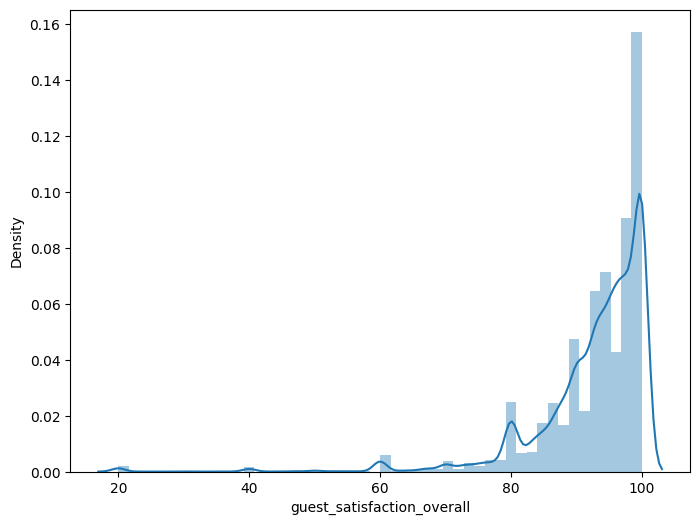

In [189]:
plt.figure(figsize=(8, 6))
sns.distplot(df['guest_satisfaction_overall'], kde=True)
plt.show()

- The guest_satisfaction_overall score ranges from 20 to 100, so it i s a numerical feature.
- We can check it's correlation with the target feature and see how much correlated these features with our target?

In [190]:
df[['guest_satisfaction_overall', 'realSum']].corr()

,guest_satisfaction_overall,realSum
guest_satisfaction_overall,1.000000,-0.001888
realSum,-0.001888,1.000000


- From the correlation itself, we can see that there is very less negative correlation between these two features.
- So, guest_satisfaction_overall does not have much impact on the price listings and we can drop this feature while modelling.


## bedrooms column

In [192]:
df['bedrooms'].value_counts()

1     36333
2      9290
0      4485
3      1477
4        96
5        10
9        10
6         2
10        2
8         2
Name: bedrooms, dtype: int64

In [193]:
df.groupby('bedrooms')['realSum'].mean()

bedrooms
0      255.209676
1      238.846557
2      389.017352
3      646.119874
4      652.924520
5      707.486014
6     4467.149208
8      245.184506
9      148.064646
10      77.743902
Name: realSum, dtype: float64

In [194]:
df[['bedrooms', 'realSum']].corr()

,bedrooms,realSum
bedrooms,1.000000,0.221653
realSum,0.221653,1.000000


- There is a positive correalation between number of bedrooms and price of  a room.
- So,we can say that the increase in number of bedrooms increases the listing prices of the hotels or rooms.

## Relation Between dist, metro_dist and realSum

In [195]:
df[['dist', 'metro_dist', 'realSum']].corr()

,dist,metro_dist,realSum
dist,1.000000,0.558064,-0.044725
metro_dist,0.558064,1.000000,-0.061025
realSum,-0.044725,-0.061025,1.000000


- There is a small negative correlation between the distance from city centre and the price of the listing in the city.
- Similarly, there is also a minor negative correlation between the distance from metro station to the price of the listing in the city.

In [196]:
df.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'day_type', 'location'],
      dtype='object')

## attr_index, attr_index_norm rest_index, rest_index_norm

In [197]:
df[['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'realSum']].corr()

,attr_index,attr_index_norm,rest_index,rest_index_norm,realSum
attr_index,1.000000,0.714847,0.850229,0.544403,0.178228
attr_index_norm,0.714847,1.000000,0.527623,0.472143,0.292396
rest_index,0.850229,0.527623,1.000000,0.617970,0.134722
rest_index_norm,0.544403,0.472143,0.617970,1.000000,0.144094
realSum,0.178228,0.292396,0.134722,0.144094,1.000000


- From this, we conclude that attraction index and resturant index has positive relation with the price listing.
- But we are only keeping the normalized version of this feature as these features have slightly better correlation than the normal version.
- Let's keep attr_index_norm and rest_index_norm and delete rest of the two features

## 'lng' and 'lat' columns

In [198]:
df[['lng', 'lat', 'realSum']].corr()

,lng,lat,realSum
lng,1.000000,-0.159214,-0.173833
lat,-0.159214,1.000000,0.211805
realSum,-0.173833,0.211805,1.000000


- we can see both latitudes and longitudes have some correlation with the price listing of a room.
- Longitude has negative correlation with the price listing whereas latitude has the positive correlation with the price listing of a room.

## Data Preparation

In [199]:
df.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'day_type', 'location'],
      dtype='object')

In [200]:
dropped_cols = ['room_type', 'cleanliness_rating', 'guest_satisfaction_overall',
                'attr_index', 'rest_index']

final_df = df.drop(dropped_cols, axis=1)
print(final_df.shape)
final_df.head()

(51707, 16)


,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,day_type,location
0,194.033698,False,True,2.0,False,1,0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772,weekdays,Amsterdam
1,344.245776,False,True,4.0,False,0,0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432,weekdays,Amsterdam
2,264.101422,False,True,2.0,False,0,1,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103,weekdays,Amsterdam
3,433.529398,False,True,4.0,False,0,1,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663,weekdays,Amsterdam
4,485.552926,False,True,2.0,True,0,0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508,weekdays,Amsterdam


## Replacing boolean values as binary numeric values

In [201]:
final_df.replace({"room_shared": {True: 1, False: 0},
                  "room_private": {True: 1, False: 0},
                  'host_is_superhost': {True: 1, False: 0}},
                 inplace=True)
final_df.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,day_type,location
0,194.033698,0,1,2.0,0,1,0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772,weekdays,Amsterdam
1,344.245776,0,1,4.0,0,0,0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432,weekdays,Amsterdam
2,264.101422,0,1,2.0,0,0,1,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103,weekdays,Amsterdam
3,433.529398,0,1,4.0,0,0,1,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663,weekdays,Amsterdam
4,485.552926,0,1,2.0,1,0,0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508,weekdays,Amsterdam


## Converting the day_type feature as binary feature as this feature only contains two values that is either weekdays or weekends.

In [202]:
final_df.loc[final_df['day_type'] == 'weekends', 'day_type'] = 1
final_df.loc[final_df['day_type'] == 'weekdays', 'day_type'] = 0

In [203]:
final_df.rename({"day_type": "is_weekend"}, axis=1, inplace = True)
final_df['is_weekend'] = final_df['is_weekend'].astype('int')
final_df.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,is_weekend,location
0,194.033698,0,1,2.0,0,1,0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772,0,Amsterdam
1,344.245776,0,1,4.0,0,0,0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432,0,Amsterdam
2,264.101422,0,1,2.0,0,0,1,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103,0,Amsterdam
3,433.529398,0,1,4.0,0,0,1,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663,0,Amsterdam
4,485.552926,0,1,2.0,1,0,0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508,0,Amsterdam


In [204]:
final_df = pd.get_dummies(final_df, columns = ['location'])
final_df.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,bedrooms,dist,metro_dist,...,is_weekend,location_Amsterdam,location_Athens,location_Barcelona,location_Berlin,location_Budapest,location_Lisbon,location_Paris,location_Rome,location_Vienna
0,194.033698,0,1,2.0,0,1,0,1,5.022964,2.539380,...,0,1,0,0,0,0,0,0,0,0
1,344.245776,0,1,4.0,0,0,0,1,0.488389,0.239404,...,0,1,0,0,0,0,0,0,0,0
2,264.101422,0,1,2.0,0,0,1,1,5.748312,3.651621,...,0,1,0,0,0,0,0,0,0,0
3,433.529398,0,1,4.0,0,0,1,2,0.384862,0.439876,...,0,1,0,0,0,0,0,0,0,0
4,485.552926,0,1,2.0,1,0,0,1,0.544738,0.318693,...,0,1,0,0,0,0,0,0,0,0


In [205]:
final_df.drop('location_Vienna', axis=1, inplace=True)
final_df.shape

(51707, 23)

## Data Preparation

In [228]:
data = final_df.drop('realSum', axis=1)
labels = final_df['realSum']

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41365, 22)
(10342, 22)
(41365,)
(10342,)


In [231]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [232]:
rf_model = RandomForestRegressor()

In [233]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [234]:
predictions = rf_model.predict(X_test)

In [235]:
test_vs_pred_df = pd.DataFrame({"actual": y_test, "pred": predictions})
test_vs_pred_df

,actual,pred
12395,83.434608,180.590515
44703,182.124237,150.681505
49956,658.672837,387.948902
6129,133.339582,126.274225
3227,173.880440,158.149181
...,...,...
20189,355.300188,296.348499
47528,138.638861,144.701096
10734,209.404506,204.027802
3277,76.629250,80.493520


In [236]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [237]:
print("Mean absolute error is ", mean_absolute_error(y_test, predictions))
print("Mean squared error is ", mean_squared_error(y_test, predictions))
print("Root Mean absolute error is ", mean_squared_error(y_test, predictions, squared=False))
print("Rsquare is ", r2_score(y_test, predictions))

Mean absolute error is  56.40801083979667
Mean squared error is  41637.107423435824
Root Mean absolute error is  204.05172732284288
Rsquare is  0.6307402032731895


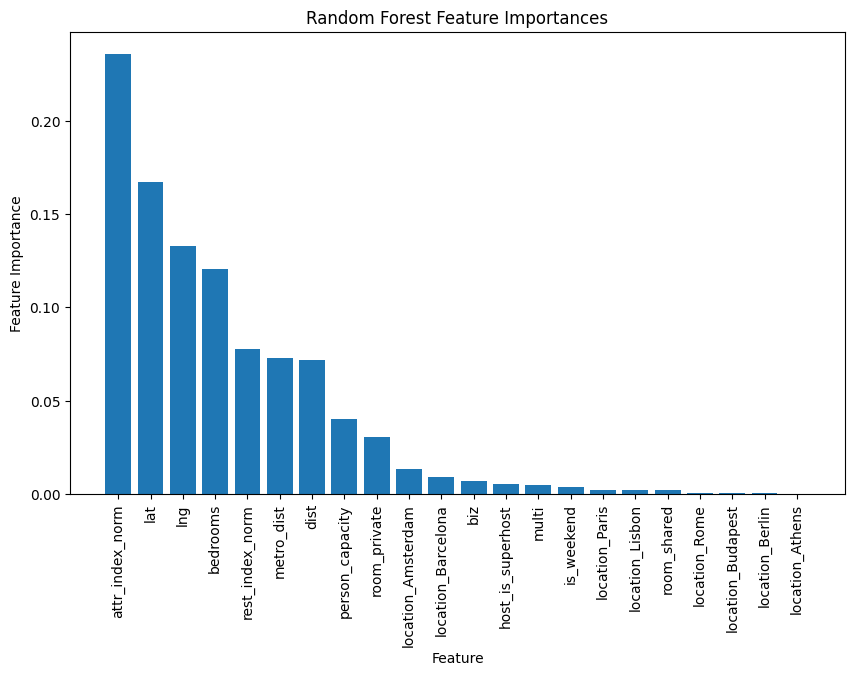

In [238]:
# Get feature importances
feature_importances = rf_model.feature_importances_
# Get the feature names or labels
feature_names = X_train.columns  # Replace with your actual feature names or labels
# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()


## Gradient Boosting Regressor

In [216]:
gb_model = GradientBoostingRegressor()

In [217]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [218]:
predictions = gb_model.predict(X_test)

In [219]:
test_vs_pred_df = pd.DataFrame({"actual": y_test, "pred": predictions})
test_vs_pred_df

,actual,pred
12395,83.434608,156.286175
44703,182.124237,182.411320
49956,658.672837,348.236286
6129,133.339582,159.328609
3227,173.880440,127.830675
...,...,...
20189,355.300188,270.077838
47528,138.638861,145.675517
10734,209.404506,215.028433
3277,76.629250,85.322193


In [220]:
print("Mean absolute error is ", mean_absolute_error(y_test, predictions))
print("Mean squared error is ", mean_squared_error(y_test, predictions))
print("Root Mean absolute error is ", mean_squared_error(y_test, predictions, squared=False))
print("Rsquare is ", r2_score(y_test, predictions))

Mean absolute error is  81.0483364755751
Mean squared error is  75022.64498484836
Root Mean absolute error is  273.9026195290004
Rsquare is  0.33465967375485905


## XGBoost Regressor

In [239]:
xgb_model = XGBRegressor()

In [240]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [241]:
predictions = xgb_model.predict(X_test)

In [242]:
test_vs_pred_df = pd.DataFrame({"actual": y_test, "pred": predictions})
test_vs_pred_df

,actual,pred
12395,83.434608,133.102646
44703,182.124237,91.317757
49956,658.672837,376.996063
6129,133.339582,128.610458
3227,173.880440,142.187714
...,...,...
20189,355.300188,288.779236
47528,138.638861,169.426758
10734,209.404506,199.532959
3277,76.629250,81.207474


In [243]:
print("Mean absolute error is ", mean_absolute_error(y_test, predictions))
print("Mean squared error is ", mean_squared_error(y_test, predictions))
print("Root Mean absolute error is ", mean_squared_error(y_test, predictions, squared=False))
print("Rsquare is ", r2_score(y_test, predictions))

Mean absolute error is  72.13446634863175
Mean squared error is  46658.82998861539
Root Mean absolute error is  216.00655080023705
Rsquare is  0.586204922885462


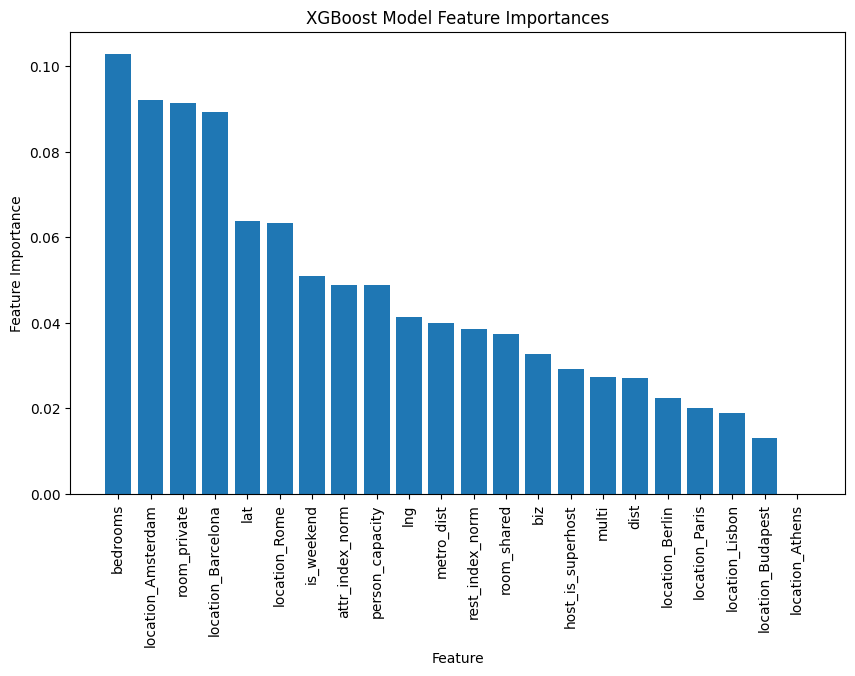

In [245]:
# Get feature importances
feature_importances = xgb_model.feature_importances_
# Get the feature names or labels
feature_names = X_train.columns  # Replace with your actual feature names or labels

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("XGBoost Model Feature Importances")
plt.show()
